## <i> <span style='color:red'>SIMPLE LINEAR REGRESSION:DELIVERY TIME DATA</i></span>
###  Problem Statment:Predict delivery time using sorting time

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from ml_metrics import rmse

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
delivery_time= pd.read_csv('delivery_time.csv')
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Checking for null values
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
# Renaming the columns 
delivery_time = delivery_time.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)

In [5]:
delivery_time.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# Droping the duplicate values in the data set if it is there
delivery_time[delivery_time.duplicated(keep = False)]

,DT,ST


In [7]:
# Correlation
delivery_time.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


### Checking for outliers in the data with the help of visualization_boxplot

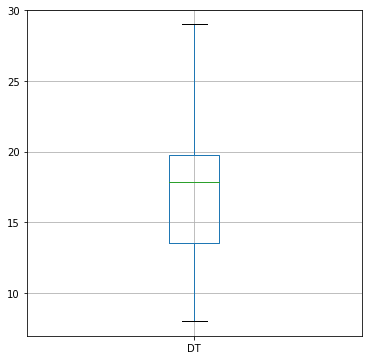

In [8]:
plt.figure(figsize = (6,6))
delivery_time.boxplot(column=['DT'])
plt.show()

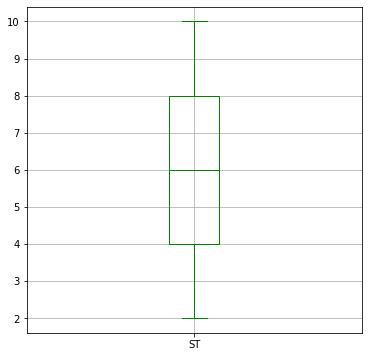

In [9]:
plt.figure(figsize = (6,6))
delivery_time.boxplot(column=['ST'],color='green')
plt.show()

<AxesSubplot:xlabel='DT', ylabel='Density'>

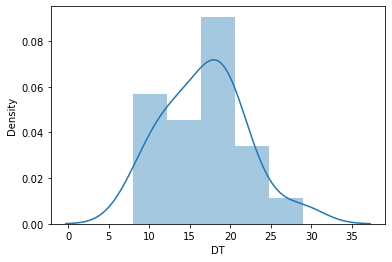

In [10]:
# Cheking if the data is normally ditributed, using distplot
sns.distplot(delivery_time['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

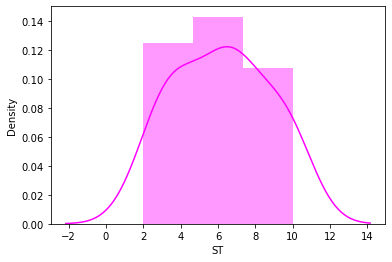

In [11]:
sns.distplot(delivery_time['ST'],color='magenta')

### Model1-construct a model without applying any transformation - Linear model

In [12]:
model1 = smf.ols('DT~ST', data = delivery_time).fit()

### Regresssion Plot

<AxesSubplot:xlabel='ST', ylabel='DT'>

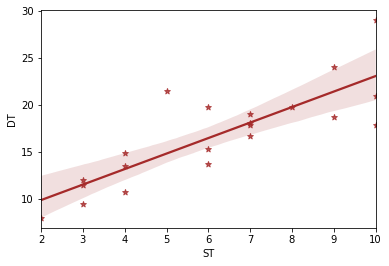

In [13]:
sns.regplot(x="ST", y="DT", data = delivery_time,marker="*" ,color='brown')

### Coefficients

In [14]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64



### T & P-values

In [15]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


### R-squared and Adj R-squared values

In [16]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        13:51:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the RMSE value

In [18]:
pred1 = model1.predict(delivery_time.ST)

In [19]:
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [20]:
actual = delivery_time.DT

In [21]:

r1=rmse(pred1,actual)
r1

2.7916503270617654

### Model2- Constructing a new model by applying a Log Transformation on the independent variables

In [22]:
model2 = smf.ols('DT~np.log(ST)', data = delivery_time).fit()

In [23]:
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        13:51:06   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the RMSE value

In [25]:
pred2 = model2.predict(delivery_time.ST)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [26]:
r2=rmse(pred2,actual)
r2

2.7331714766820663

### Model3-Constructing a new model, by applying Exponential transformation 

In [27]:
model3 = smf.ols('DT~np.exp(ST)', data = delivery_time).fit()

In [28]:
#Coefficents
model3.params

Intercept     15.083578
np.exp(ST)     0.000393
dtype: float64

In [29]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00396
Time:                        13:51:07   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicting the model

In [30]:
pred3=model3.predict(delivery_time.ST)


### RMSE calculation

In [31]:
r3=rmse(pred3,actual)
r3

3.958615702523664

### skipping prediction of model3, since the Rsquared value is too low, with 36.1%

### Model4- Construct a new model, by applying a squareroot transformation 

In [32]:
model4 = smf.ols('DT~np.sqrt(ST)', data = delivery_time).fit()

In [33]:
#Coefficents
model4.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [34]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           2.61e-06
Time:                        13:51:07   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred4 = (model4.predict(delivery_time.ST))
pred4

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [36]:
r4=rmse(pred4,actual)
r4

2.7315432100912105

### Model5- Applying exponential transformation in other way and predict a new model

In [37]:
model5 = smf.ols('np.log(DT)~ST', data = delivery_time).fit()

In [38]:
#Coefficents
model5.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [39]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        13:51:08   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Looking into the  RMSE value

In [40]:
pred5 = np.exp(model5.predict(delivery_time.ST))
pred5

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [41]:
r5=rmse(pred5,actual)
r5

2.9402503230562007

### Model6-creating a new model with quadratic equation

In [42]:
delivery_time["st_sqr"]=delivery_time.ST*delivery_time.ST
delivery_time.head(2)

,DT,ST,st_sqr
0,21.0,10,100
1,13.5,4,16


In [43]:
model6=smf.ols('DT~ST+st_sqr',data=delivery_time).fit()

In [44]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           2.39e-05
Time:                        13:51:08   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5222      4.160      0.847      0.408      -5.217      12.261
ST             2.8130      1.461      1.926      0.070      -0.256       5.882
st_sqr        -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model prediction

In [45]:
pred6=model6.predict(delivery_time)
pred6

0     22.332430
1     13.283069
2     17.045108
3     21.290194
4     22.332430
5     17.045108
6     18.646533
7     11.122455
8     22.332430
9     21.290194
10    20.061562
11    13.283069
12    18.646533
13    11.122455
14    11.122455
15    13.283069
16    17.045108
17    18.646533
18     8.775444
19    18.646533
20    15.257287
dtype: float64

In [46]:
r6=rmse(pred6,actual)
r6

2.742148203780122

In [47]:
con={"Model":pd.Series(["Model1","Model2","Model3","Model4","Model5","Model6"]),
     "Rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared),
     "RMSE":(r1,r2,r3,r4,r5,r6)
    }
con=pd.DataFrame(con)
con

,Model,Rsquared,RMSE
0,Model1,0.682271,2.791650
1,Model2,0.695443,2.733171
2,Model3,0.361118,3.958616
3,Model4,0.695806,2.731543
4,Model5,0.710948,2.940250
5,Model6,0.693440,2.742148


## Inference:
### Comparison between all models , model4 has  R-squared value of. 0.6958.And we know higher R-squared value and a lower RMSE value maked a better model.Hence model4 is better model to predict delivery_time